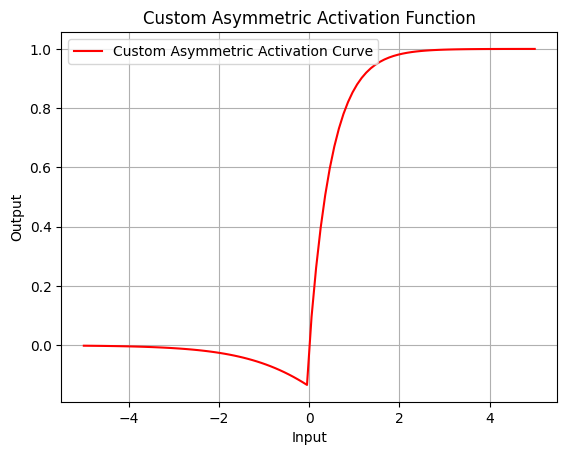

ReLU training: 
Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 22s 26ms/step - accuracy: 0.3818 - loss: 1.7262 - val_accuracy: 0.5500 - val_loss: 1.2688
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - accuracy: 0.5947 - loss: 1.1591 - val_accuracy: 0.6216 - val_loss: 1.0853
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 22s 28ms/step - accuracy: 0.6481 - loss: 1.0157 - val_accuracy: 0.6490 - val_loss: 1.0065
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 24s 31ms/step - accuracy: 0.6845 - loss: 0.9113 - val_accuracy: 0.6645 - val_loss: 0.9768
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 23s 29ms/step - accuracy: 0.7102 - loss: 0.8343 - val_accuracy: 0.6671 - val_loss: 0.9559
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 26s 33ms/step - accuracy: 0.7293 - loss: 0.7754 - val_accuracy: 0.6884 - val_loss: 0.9104
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 23s 29ms/step - accuracy: 0.7561 - loss: 0.7064 - val_accuracy: 0.7005 - val_loss: 0.8943
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 22s 28ms/step - accuracy: 0.7737 -

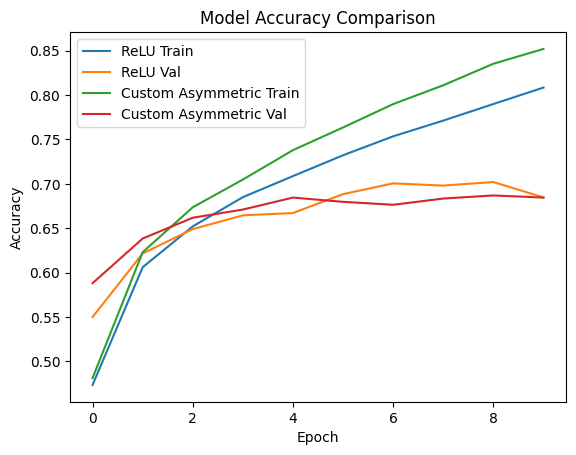

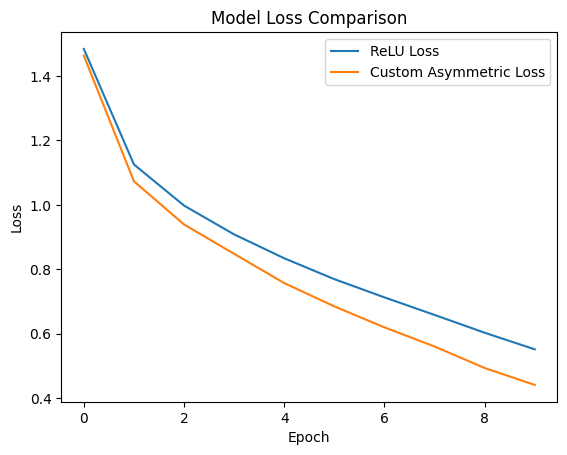

Training Summary:
ReLU: Total Time = 229.40s, Final Accuracy = 0.6847
Custom Asymmetric: Total Time = 626.84s, Final Accuracy = 0.6845
Feature Maps using ReLU:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


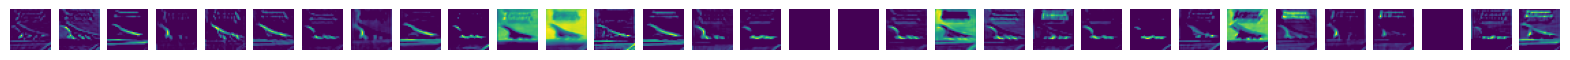

Feature Maps using Custom Asymmetric Activation:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


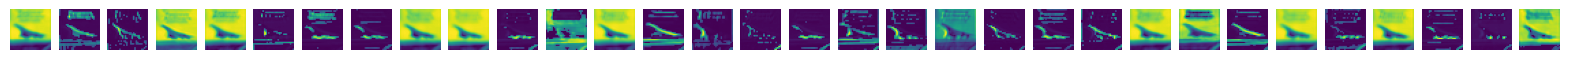

In [6]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import time


# Define the Custom Asymmetric Activation Function
def custom_asymmetric_activation(x):
    alpha = 0.2  # Controls slope for negative values
    beta = 1.0   # Controls the scale for positive values
    k = 2.0      # Controls the sharpness on the positive side
    return tf.where(x < 0, -alpha * tf.math.log(1 + tf.exp(x)), beta * (1 - tf.exp(-k * x)))

# Register Custom Activation in TensorFlow's activation dictionary for easy access
tf.keras.utils.get_custom_objects().update({'custom_asymmetric_activation': tf.keras.layers.Activation(custom_asymmetric_activation)})

# Visualize Custom Asymmetric Activation Function curve
def visualize_activation_curve():
    x = np.linspace(-5, 5, 100)  # Extended range for better visualization
    alpha = 0.2
    beta = 1.0
    k = 2.0
    y = np.where(x < 0, -alpha * np.log(1 + np.exp(x)), beta * (1 - np.exp(-k * x)))
    plt.plot(x, y, label='Custom Asymmetric Activation Curve', color='red')
    plt.title('Custom Asymmetric Activation Function')
    plt.xlabel('Input')
    plt.ylabel('Output')
    plt.legend()
    plt.grid(True)
    plt.show()

# Run the visualization to confirm shape
visualize_activation_curve()


# Model Parameters
batch_size = 64
epochs = 10
input_shape = (32, 32, 3)

# Load and preprocess CIFAR-10 data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# Define a function to create a CNN model
def create_model(activation_func):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Input(shape=input_shape),
        tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation=activation_func),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation=activation_func),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation=activation_func),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Create models with ReLU and Custom Asymmetric Activation functions
model_relu = create_model('relu')
model_custom_asymmetric = create_model(custom_asymmetric_activation)

# Train and time the ReLU model
print("ReLU training: ")
start_time_relu = time.time()
history_relu = model_relu.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))
total_time_relu = time.time() - start_time_relu

# Train and time the Custom Asymmetric Activation model
print("Custom Asymmetric Activation training: ")
start_time_custom_asymmetric = time.time()
history_custom_asymmetric = model_custom_asymmetric.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))
total_time_custom_asymmetric = time.time() - start_time_custom_asymmetric

# Plot training and validation accuracy for both models
plt.plot(history_relu.history['accuracy'], label='ReLU Train')
plt.plot(history_relu.history['val_accuracy'], label='ReLU Val')
plt.plot(history_custom_asymmetric.history['accuracy'], label='Custom Asymmetric Train')
plt.plot(history_custom_asymmetric.history['val_accuracy'], label='Custom Asymmetric Val')
plt.title('Model Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.show()

# Plot training and validation loss for both models
plt.plot(history_relu.history['loss'], label='ReLU Loss')
plt.plot(history_custom_asymmetric.history['loss'], label='Custom Asymmetric Loss')
plt.title('Model Loss Comparison')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

# Print summary of training results
print("Training Summary:")
print(f"ReLU: Total Time = {total_time_relu:.2f}s, Final Accuracy = {history_relu.history['val_accuracy'][-1]:.4f}")
print(f"Custom Asymmetric: Total Time = {total_time_custom_asymmetric:.2f}s, Final Accuracy = {history_custom_asymmetric.history['val_accuracy'][-1]:.4f}")

# Define a function to plot feature maps for a given layer index
def plot_feature_maps(model, image, layer_idx):
    from tensorflow.keras import Model
    
    # Create a new model that outputs the feature maps at a specific layer
    feature_map_model = Model(inputs=model.inputs, outputs=model.layers[layer_idx].output)
    feature_map = feature_map_model.predict(np.expand_dims(image, axis=0))
    
    # Plot feature maps
    num_filters = feature_map.shape[-1]
    fig, axes = plt.subplots(1, num_filters, figsize=(20, 20))
    for i in range(num_filters):
        ax = axes[i]
        ax.imshow(feature_map[0, :, :, i], cmap='viridis')
        ax.axis('off')
    plt.show()

# Test on a sample image from the test set
sample_image = x_test[3]

# Plot feature maps for a specific layer in each model
print("Feature Maps using ReLU:")
plot_feature_maps(model_relu, sample_image, layer_idx=0)
print("Feature Maps using Custom Asymmetric Activation:")
plot_feature_maps(model_custom_asymmetric, sample_image, layer_idx=0)


Feature Maps using ReLU:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


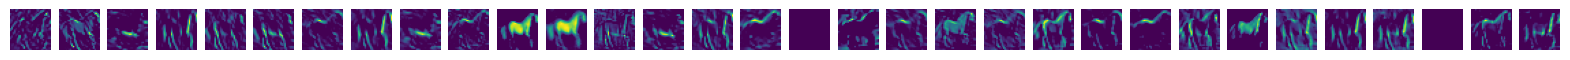

Feature Maps using Custom Asymmetric Activation:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


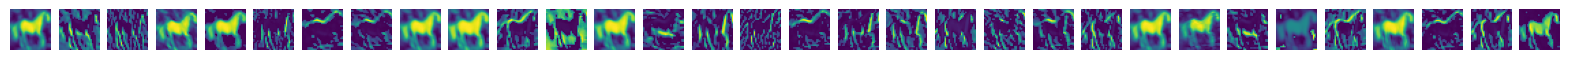

Feature Maps using ReLU:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


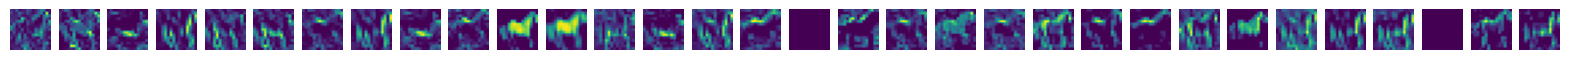

Feature Maps using Custom Asymmetric Activation:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


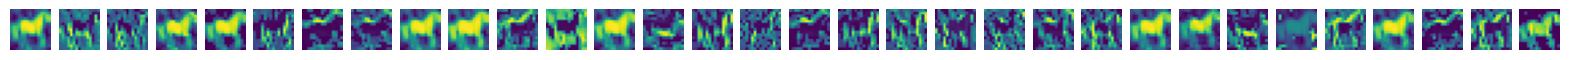

Feature Maps using ReLU:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


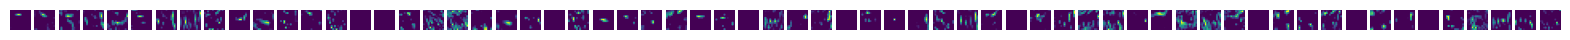

Feature Maps using Custom Asymmetric Activation:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


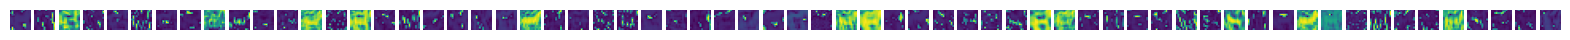

Feature Maps using ReLU:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


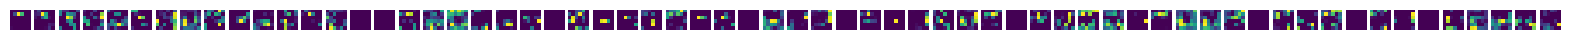

Feature Maps using Custom Asymmetric Activation:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


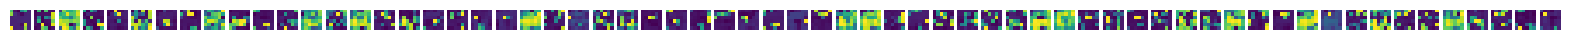

In [16]:
# Test on a sample image from the test set
sample_image = x_test[13]

# Plot feature maps for a specific layer in each model
print("Feature Maps using ReLU:")
plot_feature_maps(model_relu, sample_image, layer_idx=0)
print("Feature Maps using Custom Asymmetric Activation:")
plot_feature_maps(model_custom_asymmetric, sample_image, layer_idx=0)
print("Feature Maps using ReLU:")
plot_feature_maps(model_relu, sample_image, layer_idx=1)
print("Feature Maps using Custom Asymmetric Activation:")
plot_feature_maps(model_custom_asymmetric, sample_image, layer_idx=1)
print("Feature Maps using ReLU:")
plot_feature_maps(model_relu, sample_image, layer_idx=2)
print("Feature Maps using Custom Asymmetric Activation:")
plot_feature_maps(model_custom_asymmetric, sample_image, layer_idx=2)
print("Feature Maps using ReLU:")
plot_feature_maps(model_relu, sample_image, layer_idx=3)
print("Feature Maps using Custom Asymmetric Activation:")
plot_feature_maps(model_custom_asymmetric, sample_image, layer_idx=3)

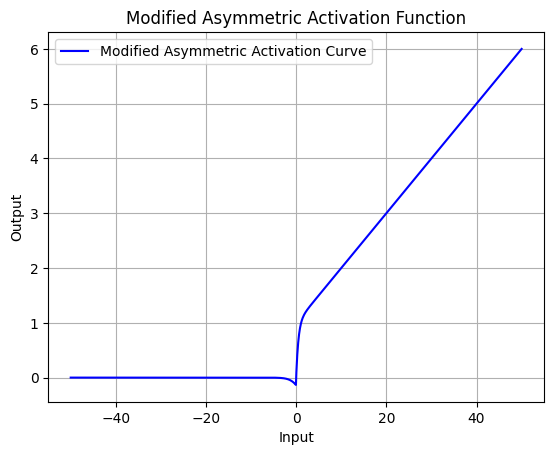

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Define the Updated Asymmetric Activation Function
def modified_asymmetric_activation(x, alpha=0.2, beta=1.0, k=2.0, m=0.1):
    return np.where(x < 0, -alpha * np.log(1 + np.exp(x)), beta * (1 - np.exp(-k * x)) + m * x)

# Visualization of the Updated Activation Curve
def visualize_modified_activation_curve():
    x = np.linspace(-50, 50, 1000)
    y = modified_asymmetric_activation(x)
    plt.plot(x, y, label='Modified Asymmetric Activation Curve', color='blue')
    plt.title('Modified Asymmetric Activation Function')
    plt.xlabel('Input')
    plt.ylabel('Output')
    plt.legend()
    plt.grid(True)
    plt.show()

# Run the visualization to confirm shape
visualize_modified_activation_curve()


# custom_asymmetric_activation newwwww

In [29]:
# Save the trained ReLU model
model_relu.save("relu_model_16_batch_ep_40.keras")


In [30]:
print(f"ReLU: Total Time = {total_time_relu:.2f}s, Final Accuracy = {history_relu.history['val_accuracy'][-1]:.4f}")

ReLU: Total Time = 1667.12s, Final Accuracy = 0.6668


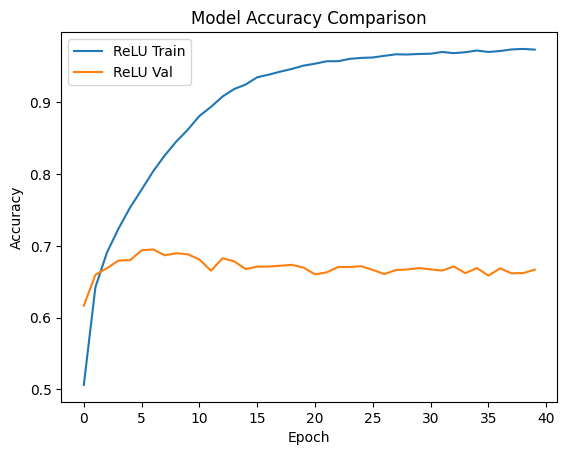

In [31]:
# Plot training and validation accuracy for both models
plt.plot(history_relu.history['accuracy'], label='ReLU Train')
plt.plot(history_relu.history['val_accuracy'], label='ReLU Val')
# plt.plot(history_custom_asymmetric.history['accuracy'], label='Custom Asymmetric Train')
# plt.plot(history_custom_asymmetric.history['val_accuracy'], label='Custom Asymmetric Val')
plt.title('Model Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.show()

In [35]:
import tensorflow as tf; tf.keras.backend.clear_session()
tf.keras.backend.clear_session()


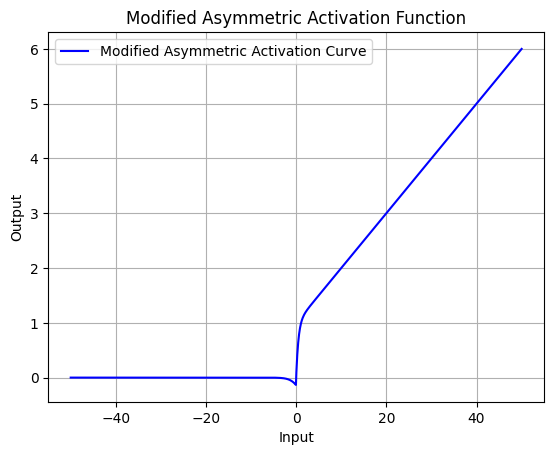

Custom Asymmetric Activation training: 
Epoch 1/40
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 82s 25ms/step - accuracy: 0.3669 - loss: 1.7418 - val_accuracy: 0.5699 - val_loss: 1.2140
Epoch 2/40
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 81s 26ms/step - accuracy: 0.5849 - loss: 1.1718 - val_accuracy: 0.6039 - val_loss: 1.1131
Epoch 3/40
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 90s 29ms/step - accuracy: 0.6441 - loss: 1.0132 - val_accuracy: 0.6418 - val_loss: 1.0073
Epoch 4/40
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 97s 31ms/step - accuracy: 0.6763 - loss: 0.9228 - val_accuracy: 0.6293 - val_loss: 1.0485
Epoch 5/40
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 92s 30ms/step - accuracy: 0.6954 - loss: 0.8634 - val_accuracy: 0.6509 - val_loss: 0.9991
Epoch 6/40
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 87s 28ms/step - accuracy: 0.7188 - loss: 0.7995 - val_accuracy: 0.6505 - val_loss: 1.0090
Epoch 7/40
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 94s 30ms/step - accuracy: 0.7369 - loss: 0.7442 - val_accuracy: 0.6603 - val_loss: 0.9849
Epoch 8/40
3125/3125 ━━━━━━━━━━━━━━━

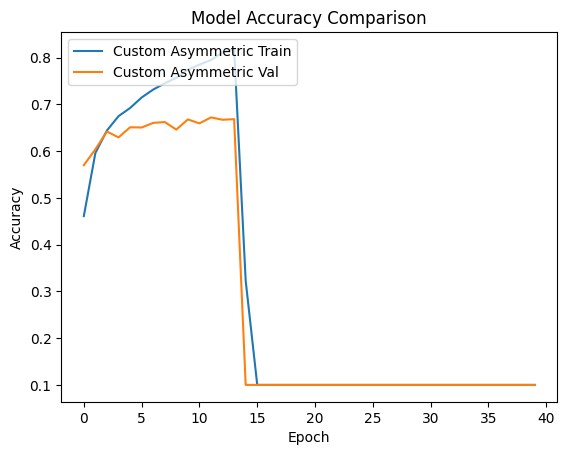

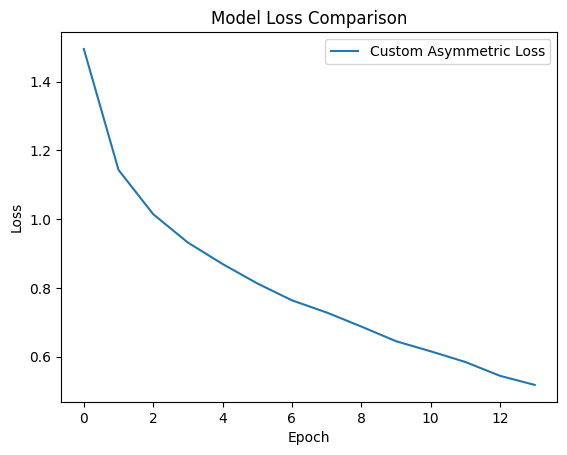

Custom Asymmetric: Total Time = 3633.42s, Final Accuracy = 0.1000


In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import time


# Define the Updated Asymmetric Activation Function
# def custom_asymmetric_activation(x, alpha=0.2, beta=1.0, k=2.0, m=0.1):
#     return np.where(x < 0, -alpha * np.log(1 + np.exp(x)), beta * (1 - np.exp(-k * x)) + m * x)

# Define the Updated Asymmetric Activation Function using TensorFlow operations
def custom_asymmetric_activation(x, alpha=0.2, beta=1.0, k=2.0, m=0.1):
    return tf.where(x < 0, -alpha * tf.math.log(1 + tf.math.exp(x)), beta * (1 - tf.math.exp(-k * x)) + m * x)

# Visualization of the Updated Activation Curve
def visualize_modified_activation_curve():
    x = np.linspace(-50, 50, 1000)
    y = custom_asymmetric_activation(x)
    plt.plot(x, y, label='Modified Asymmetric Activation Curve', color='blue')
    plt.title('Modified Asymmetric Activation Function')
    plt.xlabel('Input')
    plt.ylabel('Output')
    plt.legend()
    plt.grid(True)
    plt.show()

# Run the visualization to confirm shape
visualize_modified_activation_curve()


# Register Custom Activation in TensorFlow's activation dictionary for easy access
tf.keras.utils.get_custom_objects().update({'custom_asymmetric_activation': tf.keras.layers.Activation(custom_asymmetric_activation)})


# Model Parameters
batch_size = 16
epochs = 40
input_shape = (32, 32, 3)

# Load and preprocess CIFAR-10 data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# Define a function to create a CNN model
def create_model(activation_func):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Input(shape=input_shape),
        tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation=activation_func),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation=activation_func),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation=activation_func),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Create models with Custom Asymmetric Activation functions
model_custom_asymmetric = create_model(custom_asymmetric_activation)


# Train and time the Custom Asymmetric Activation model
print("Custom Asymmetric Activation training: ")
start_time_custom_asymmetric = time.time()
history_custom_asymmetric = model_custom_asymmetric.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))
total_time_custom_asymmetric = time.time() - start_time_custom_asymmetric

# Plot training and validation accuracy for both models
plt.plot(history_custom_asymmetric.history['accuracy'], label='Custom Asymmetric Train')
plt.plot(history_custom_asymmetric.history['val_accuracy'], label='Custom Asymmetric Val')
plt.title('Model Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.show()

# Plot training and validation loss of the model
plt.plot(history_custom_asymmetric.history['loss'], label='Custom Asymmetric Loss')
plt.title('Model Loss Comparison')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

# Print summary of training results
print(f"Custom Asymmetric: Total Time = {total_time_custom_asymmetric:.2f}s, Final Accuracy = {history_custom_asymmetric.history['val_accuracy'][-1]:.4f}")


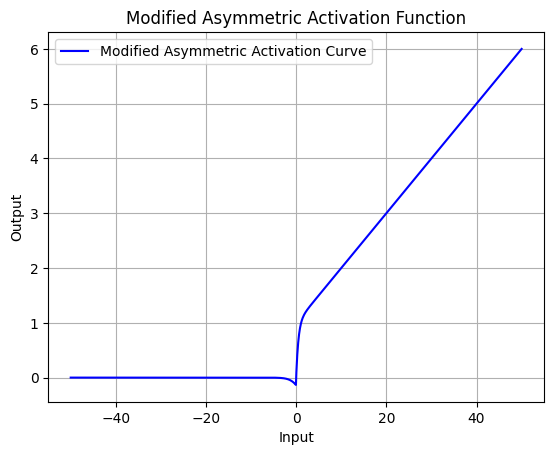

Custom Asymmetric Activation training: 
Epoch 1/8
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 85s 27ms/step - accuracy: 0.3985 - loss: 1.6621 - val_accuracy: 0.5796 - val_loss: 1.1873
Epoch 2/8
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 72s 23ms/step - accuracy: 0.6086 - loss: 1.1113 - val_accuracy: 0.6185 - val_loss: 1.0750
Epoch 3/8
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 73s 23ms/step - accuracy: 0.6546 - loss: 0.9866 - val_accuracy: 0.6528 - val_loss: 1.0078
Epoch 4/8
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 78s 25ms/step - accuracy: 0.6879 - loss: 0.8891 - val_accuracy: 0.6469 - val_loss: 1.0044
Epoch 5/8
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 84s 27ms/step - accuracy: 0.7128 - loss: 0.8297 - val_accuracy: 0.6535 - val_loss: 0.9976
Epoch 6/8
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 75s 24ms/step - accuracy: 0.7314 - loss: 0.7693 - val_accuracy: 0.6741 - val_loss: 0.9498
Epoch 7/8
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 81s 26ms/step - accuracy: 0.7482 - loss: 0.7248 - val_accuracy: 0.6711 - val_loss: 0.9503
Epoch 8/8
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 86

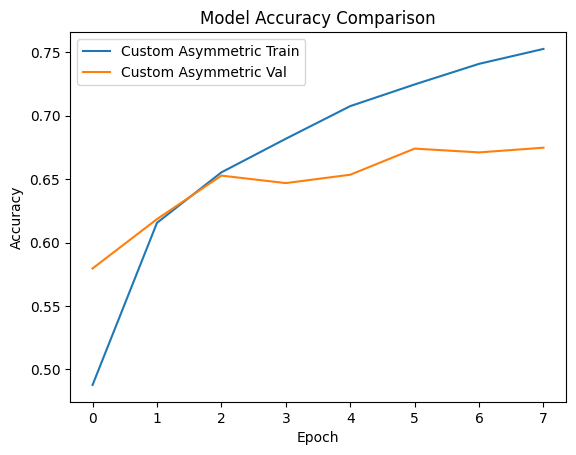

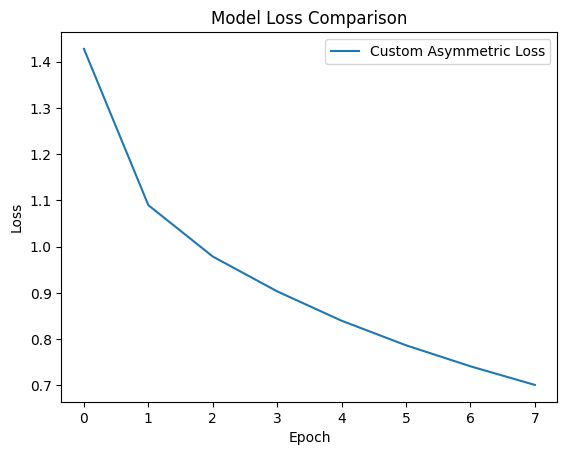

Custom Asymmetric: Total Time = 635.78s, Final Accuracy = 0.6748


In [5]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import time


# Define the Updated Asymmetric Activation Function
# def custom_asymmetric_activation(x, alpha=0.2, beta=1.0, k=2.0, m=0.1):
#     return np.where(x < 0, -alpha * np.log(1 + np.exp(x)), beta * (1 - np.exp(-k * x)) + m * x)

# Define the Updated Asymmetric Activation Function using TensorFlow operations
def custom_asymmetric_activation(x, alpha=0.2, beta=1.0, k=2.0, m=0.1):
    return tf.where(x < 0, -alpha * tf.math.log(1 + tf.math.exp(x)), beta * (1 - tf.math.exp(-k * x)) + m * x)

# Visualization of the Updated Activation Curve
def visualize_modified_activation_curve():
    x = np.linspace(-50, 50, 1000)
    y = custom_asymmetric_activation(x)
    plt.plot(x, y, label='Modified Asymmetric Activation Curve', color='blue')
    plt.title('Modified Asymmetric Activation Function')
    plt.xlabel('Input')
    plt.ylabel('Output')
    plt.legend()
    plt.grid(True)
    plt.show()

# Run the visualization to confirm shape
visualize_modified_activation_curve()


# Register Custom Activation in TensorFlow's activation dictionary for easy access
tf.keras.utils.get_custom_objects().update({'custom_asymmetric_activation': tf.keras.layers.Activation(custom_asymmetric_activation)})


# Model Parameters
batch_size = 16
epochs = 8
input_shape = (32, 32, 3)

# Load and preprocess CIFAR-10 data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# Define a function to create a CNN model
def create_model(activation_func):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Input(shape=input_shape),
        tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation=activation_func),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation=activation_func),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation=activation_func),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Create models with Custom Asymmetric Activation functions
model_custom_asymmetric = create_model(custom_asymmetric_activation)


# Train and time the Custom Asymmetric Activation model
print("Custom Asymmetric Activation training: ")
start_time_custom_asymmetric = time.time()
history_custom_asymmetric = model_custom_asymmetric.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))
total_time_custom_asymmetric = time.time() - start_time_custom_asymmetric

# Plot training and validation accuracy for both models
plt.plot(history_custom_asymmetric.history['accuracy'], label='Custom Asymmetric Train')
plt.plot(history_custom_asymmetric.history['val_accuracy'], label='Custom Asymmetric Val')
plt.title('Model Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.show()

# Plot training and validation loss of the model
plt.plot(history_custom_asymmetric.history['loss'], label='Custom Asymmetric Loss')
plt.title('Model Loss Comparison')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

# Print summary of training results
print(f"Custom Asymmetric: Total Time = {total_time_custom_asymmetric:.2f}s, Final Accuracy = {history_custom_asymmetric.history['val_accuracy'][-1]:.4f}")


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import time


# Define the Updated Asymmetric Activation Function
# def custom_asymmetric_activation(x, alpha=0.2, beta=1.0, k=2.0, m=0.1):
#     return np.where(x < 0, -alpha * np.log(1 + np.exp(x)), beta * (1 - np.exp(-k * x)) + m * x)

# Define the Updated Asymmetric Activation Function using TensorFlow operations
# def custom_asymmetric_activation(x, alpha=0.2, beta=1.0, k=2.0, m=0.1):
#     return tf.where(x < 0, -alpha * tf.math.log(1 + tf.math.exp(x)), beta * (1 - tf.math.exp(-k * x)) + m * x)

def custom_asymmetric_activation(x, alpha=0.2, beta=1.0, k=2.0, m=0.1):
    return tf.where(x < 0, -alpha * tf.math.log(1 + tf.math.exp(x)), beta * (1 - tf.math.exp(-k * tf.clip_by_value(x, -10, 10))) + m * x)


# Visualization of the Updated Activation Curve
def visualize_modified_activation_curve():
    x = np.linspace(-50, 50, 1000)
    y = custom_asymmetric_activation(x)
    plt.plot(x, y, label='Modified Asymmetric Activation Curve', color='blue')
    plt.title('Modified Asymmetric Activation Function')
    plt.xlabel('Input')
    plt.ylabel('Output')
    plt.legend()
    plt.grid(True)
    plt.show()

# Run the visualization to confirm shape
visualize_modified_activation_curve()


# Register Custom Activation in TensorFlow's activation dictionary for easy access
tf.keras.utils.get_custom_objects().update({'custom_asymmetric_activation': tf.keras.layers.Activation(custom_asymmetric_activation)})


# Model Parameters
batch_size = 64
epochs = 20
input_shape = (32, 32, 3)

# Load and preprocess CIFAR-10 data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# Define a function to create a CNN model
def create_model(activation_func):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Input(shape=input_shape),
        tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation=activation_func),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation=activation_func),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation=activation_func),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Create models with Custom Asymmetric Activation functions
model_custom_asymmetric = create_model(custom_asymmetric_activation)


# Train and time the Custom Asymmetric Activation model
print("Custom Asymmetric Activation training: ")
start_time_custom_asymmetric = time.time()
history_custom_asymmetric = model_custom_asymmetric.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))
total_time_custom_asymmetric = time.time() - start_time_custom_asymmetric

# Plot training and validation accuracy for both models
plt.plot(history_custom_asymmetric.history['accuracy'], label='Custom Asymmetric Train')
plt.plot(history_custom_asymmetric.history['val_accuracy'], label='Custom Asymmetric Val')
plt.title('Model Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.show()

# Plot training and validation loss of the model
plt.plot(history_custom_asymmetric.history['loss'], label='Custom Asymmetric Loss')
plt.title('Model Loss Comparison')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

# Print summary of training results
print(f"Custom Asymmetric: Total Time = {total_time_custom_asymmetric:.2f}s, Final Accuracy = {history_custom_asymmetric.history['val_accuracy'][-1]:.4f}")
